# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://drive.google.com/uc?id=1QPlFQU8Z-H2Joq6NYe_2HAOpNc1B9VDl"
df = pd.read_csv(url, encoding='utf-8')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Data Summarization

In [ ]:
df.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.dtypes

,0
date,object
datetime,datetime64[ns]
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
df.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [ ]:
df.drop('date', axis=1, inplace=True)

In [ ]:
df['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,268
Latte,243
Cappuccino,196
Americano,169
Cortado,99
Hot Chocolate,74
Espresso,49
Cocoa,35


In [ ]:
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month_num'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['weekday'] = df['datetime'].dt.day_name()
df['month_name'] = df['datetime'].dt.month_name()
df['year_month'] = df['datetime'].dt.strftime('%Y-%m')

In [ ]:
df.head(3)

,datetime,cash_type,card,money,coffee_name,date,hour,day,month_num,year,weekday,month_name,year_month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01,10,1,3,2024,Friday,March,2024-03
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03


In [ ]:
df['date'].min()

datetime.date(2024, 3, 1)

In [ ]:
df['date'].max()

datetime.date(2024, 7, 31)

In [ ]:
df.isnull().sum()

,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0
date,0
hour,0
day,0
month_num,0
year,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1133, 13)

In [ ]:
df.describe()


,datetime,money,hour,day,month_num,year
count,1133,1133.000000,1133.000000,1133.000000,1133.000000,1133.0
mean,2024-05-20 02:38:39.053382912,33.105808,14.552515,16.793469,5.082083,2024.0
min,2024-03-01 10:15:50.520000,18.120000,7.000000,1.000000,3.000000,2024.0
25%,2024-04-14 10:55:27.406000128,28.900000,11.000000,9.000000,4.000000,2024.0
50%,2024-05-23 12:22:06.604999936,32.820000,14.000000,18.000000,5.000000,2024.0
75%,2024-06-22 08:39:50.272999936,37.720000,18.000000,25.000000,6.000000,2024.0
max,2024-07-31 21:55:16.570000,40.000000,22.000000,31.000000,7.000000,2024.0
std,NaN,5.035366,4.084588,8.921907,1.390073,0.0


In [ ]:
df['money'].max()

40.0

In [ ]:
df['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,268
Latte,243
Cappuccino,196
Americano,169
Cortado,99
Hot Chocolate,74
Espresso,49
Cocoa,35


**Americano with Milk and Latte has Higher sales than every other product**

In [ ]:
df[df['money'] == df.money.max()][['coffee_name', 'money']].value_counts()

,,count
coffee_name,money,
Latte,40.0,16
Cappuccino,40.0,10
Hot Chocolate,40.0,5
Cocoa,40.0,1


In [ ]:
df[df['money'] == df.money.min()][['coffee_name', 'money']].value_counts()

,,count
coffee_name,money,
Espresso,18.12,10


**Expresso is the Cheapest coffee product**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1133 non-null   datetime64[ns]
 1   cash_type    1133 non-null   object        
 2   card         1044 non-null   object        
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   date         1133 non-null   object        
 6   hour         1133 non-null   int32         
 7   day          1133 non-null   int32         
 8   month_num    1133 non-null   int32         
 9   year         1133 non-null   int32         
 10  weekday      1133 non-null   object        
 11  month_name   1133 non-null   object        
 12  year_month   1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(7)
memory usage: 97.5+ KB


In [ ]:
df.head(3)

,datetime,cash_type,card,money,coffee_name,date,hour,day,month_num,year,weekday,month_name,year_month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01,10,1,3,2024,Friday,March,2024-03
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03


# EDA - Sales Analysis

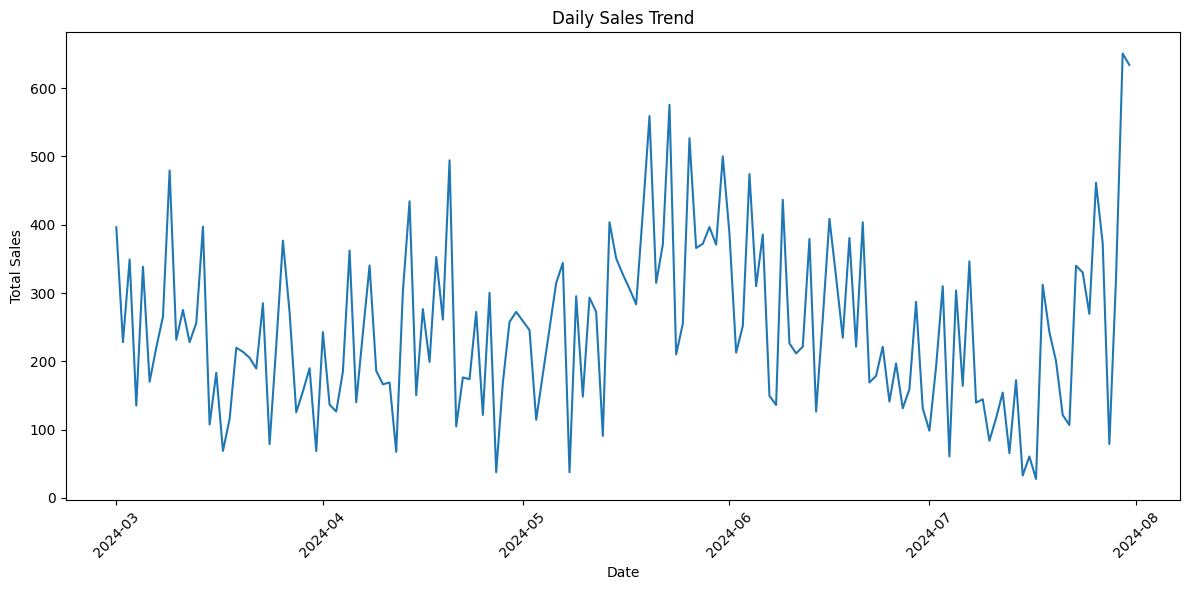

In [ ]:
# Aggregate sales by date
daily_sales = df.groupby('date')['money'].sum().reset_index()

# Plot the daily sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='money')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daily_sales

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
145,2024-07-27,372.76
146,2024-07-28,78.86
147,2024-07-29,321.82
148,2024-07-30,650.48


In [ ]:
df.shape

(1133, 13)

In [ ]:
df.isnull().sum()

,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0
date,0
hour,0
day,0
month_num,0
year,0


In [ ]:
df['card'].fillna(df['card'].mode()[0], inplace=True)
df.head()

,datetime,cash_type,card,money,coffee_name,date,hour,day,month_num,year,weekday,month_name,year_month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01,10,1,3,2024,Friday,March,2024-03
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03-01,13,1,3,2024,Friday,March,2024-03
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03-01,13,1,3,2024,Friday,March,2024-03


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
cash_type,object
card,object
money,float64
coffee_name,object
date,object
hour,int32
day,int32
month_num,int32
year,int32


In [ ]:
# Removing Outliers with the help of Z-Scores
from scipy.stats import zscore

df = df[(np.abs(zscore(df[['money']])) < 3).all(axis=1)]

In [ ]:
np.abs(zscore(df[['money']])) < 3

,money
0,True
1,True
2,True
3,True
4,True
...,...
1128,True
1129,True
1130,True
1131,True


## Sales plot

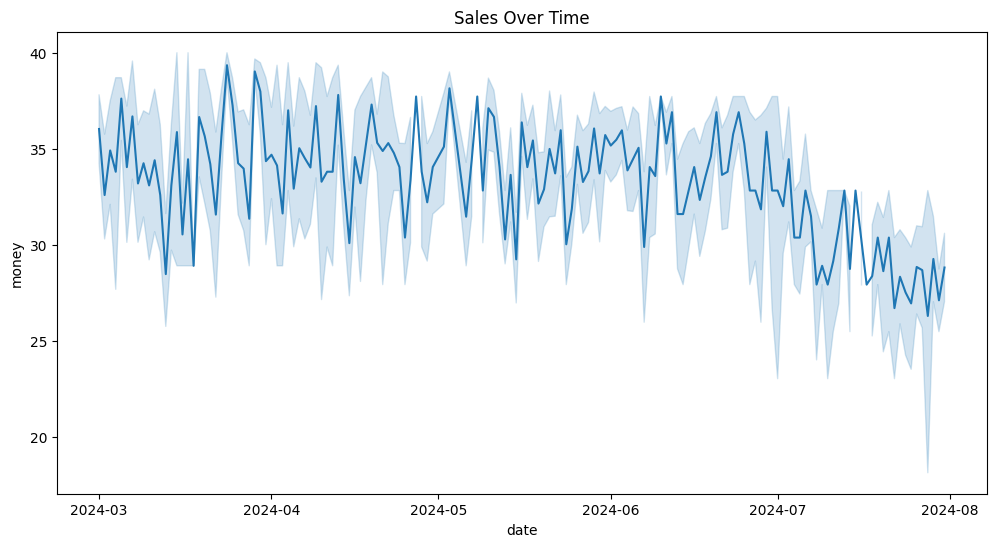

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='money')
plt.title('Sales Over Time')
plt.show()


**The sales starts to decline from the month of June**

## Sales by Coffee Type

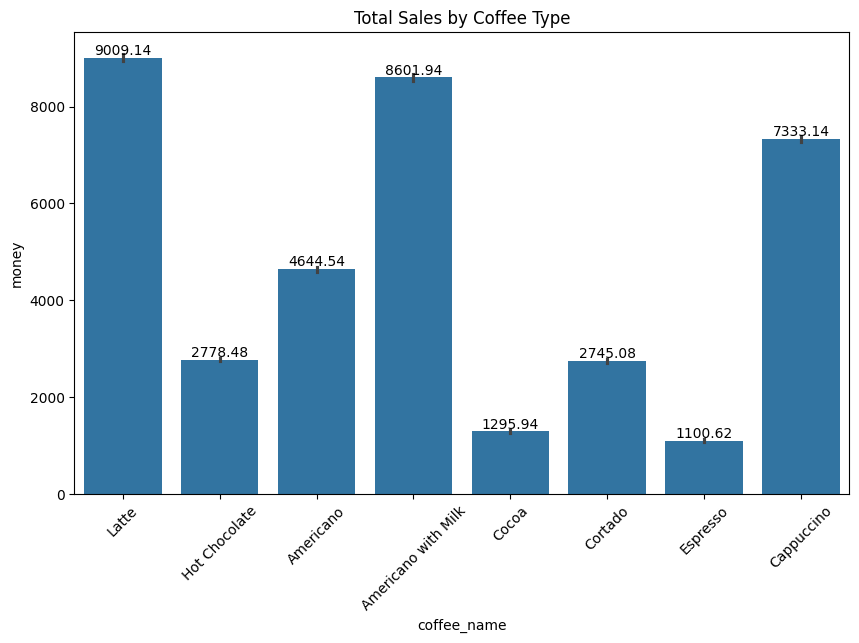

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='coffee_name', y='money', estimator=np.sum)  # Default estimator is 'sum' for total sales

# # Customize data label formatting (optional)
# for bar in plt.gca().containers[0]:
#     yval = bar.get_height()
#     # Format the label (e.g., "{:.2f}".format(yval) for two decimal places)
#     label = f"{yval:.2f}"  # Example with two decimal places
#     plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, label,
#              ha='center', va='bottom', fontsize=12)  # Adjust position and font size

ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Total Sales by Coffee Type')
plt.xticks(rotation=45)
# plt.tight_layout()  # Adjust spacing to avoid clipping data labels
plt.show()

**Latte and Americano With Milk has booked Higher sales whie Expresso and cocoa has booked minimum sales**

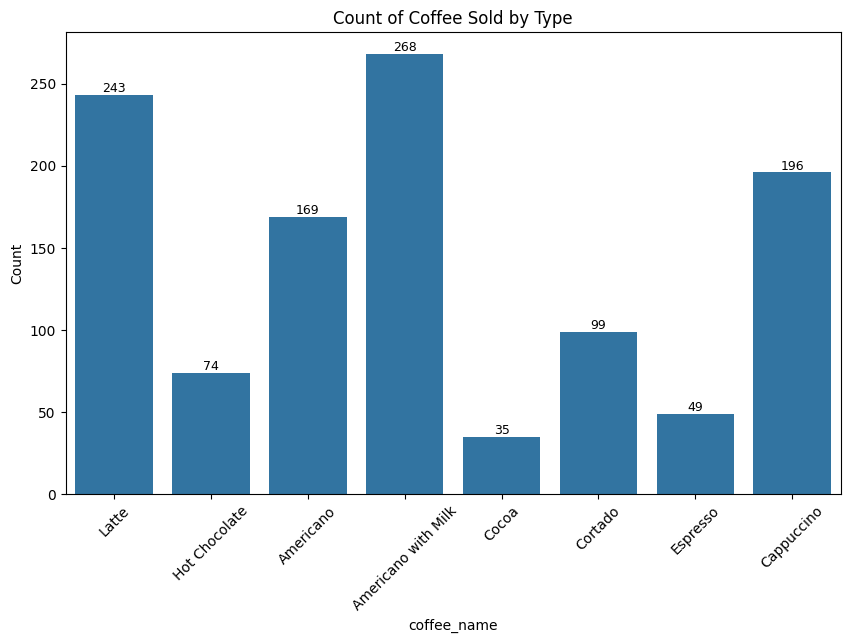

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='coffee_name', y='money', estimator=len, errorbar=None)

# # Add data labels to each bar
# for bar in ax.patches:  # Loop through each bar in the plot
#     height = bar.get_height()  # Get the height of the bar
#     ax.text(
#         bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
#         height,  # Y-coordinate: just above the bar
#         f'{int(height)}',  # Convert the height to an integer and label
#         ha='center', va='bottom', fontsize=10  # Align text and set font size
#     )

ax.bar_label(ax.containers[0], fontsize=9)

# Customize plot appearance
plt.title('Count of Coffee Sold by Type')
plt.xticks(rotation=45)
plt.ylabel('Count')  # Update the y-axis label
plt.show()


Insert aggregation function (e.g., 'sum' or 'mean'): sum


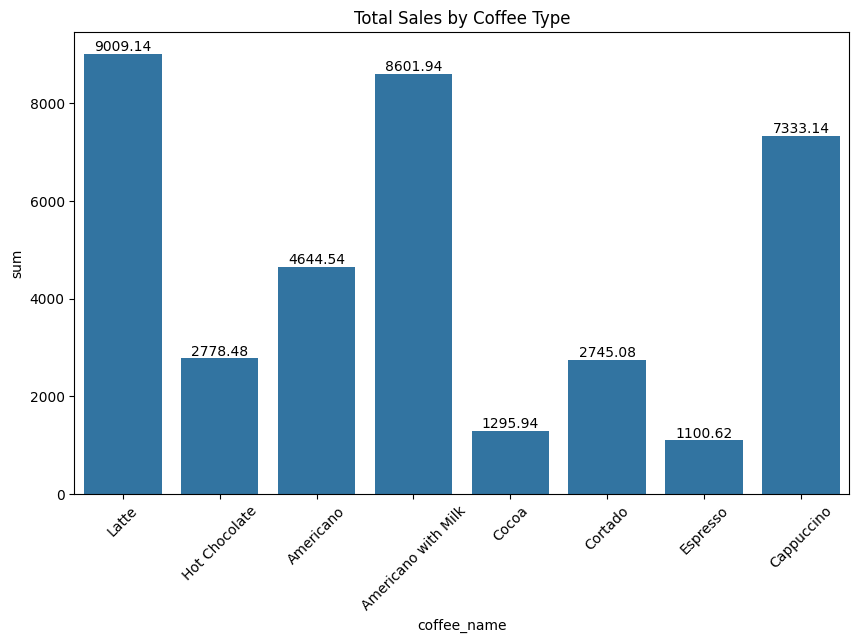

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sales_by_day(df, agg_func=np.sum):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='coffee_name', y='money', estimator=agg_func, errorbar=None)
    ax.bar_label(ax.containers[0], fontsize=10)

    # # Customize data label formatting (optional)
    # for bar in plt.gca().containers[0]:
    #     yval = bar.get_height()
    #     # Format the label (e.g., "{:.2f}".format(yval) for two decimal places)
    #     label = f"{yval:.2f}"  # Example with two decimal places
    #     plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, label,
    #             ha='center', va='bottom', fontsize=12)  # Adjust position and font size


    plt.title('Total Sales by Coffee Type')
    plt.xticks(rotation=45)
    plt.ylabel('sum')  # Update the y-axis label
    plt.show()

# Mapping string input to the respective NumPy function
agg_func_input = input("Insert aggregation function (e.g., 'sum' or 'mean'): ")

# Map the input to the corresponding NumPy function
if agg_func_input == 'sum':
    agg_func = np.sum
elif agg_func_input == 'mean':
    agg_func = np.mean
elif agg_func_input == 'median':
    agg_func = np.median
elif agg_func_input == 'min':
    agg_func = np.min
elif agg_func_input == 'max':
    agg_func = np.max
elif agg_func_input == 'count':
    agg_func = len
else:
    print("Invalid function name. Using default: np.sum")
    agg_func = np.sum

# Call the function with the selected aggregation function
plot_sales_by_day(df, agg_func=agg_func)


**Latte Has maximum sales amount and Espresso has minimum Sales amount sum**

In [ ]:
df[['hour']].max()

,0
hour,22


## Peak Sales Hours

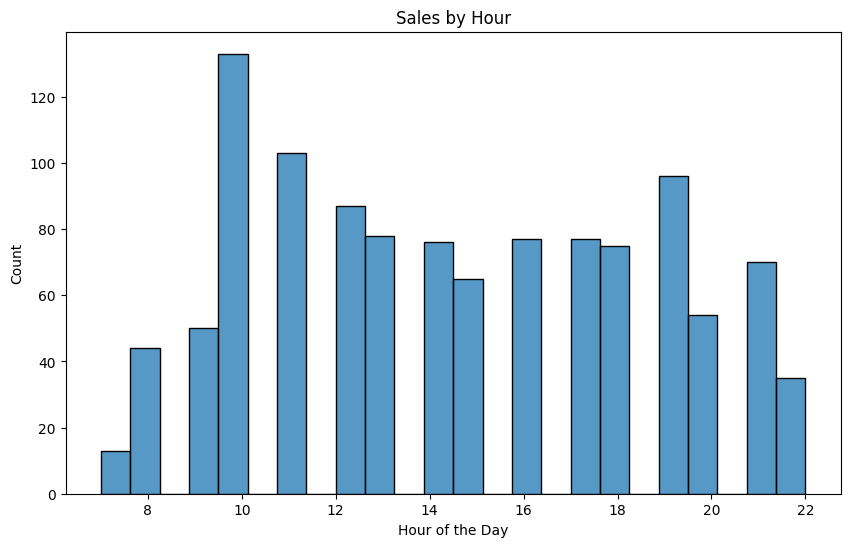

In [ ]:
# Peak Sales Hours

plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde = False)
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.show()

**Morning 10'O clock has peak sales and between 12 to 18 sales is steady while morning 8'O clock has less sales**


In [ ]:
df[['weekday', 'coffee_name']]

,weekday,coffee_name
0,Friday,Latte
1,Friday,Hot Chocolate
2,Friday,Hot Chocolate
3,Friday,Americano
4,Friday,Latte
...,...,...
1128,Wednesday,Cortado
1129,Wednesday,Americano with Milk
1130,Wednesday,Latte
1131,Wednesday,Latte


## sales by Week

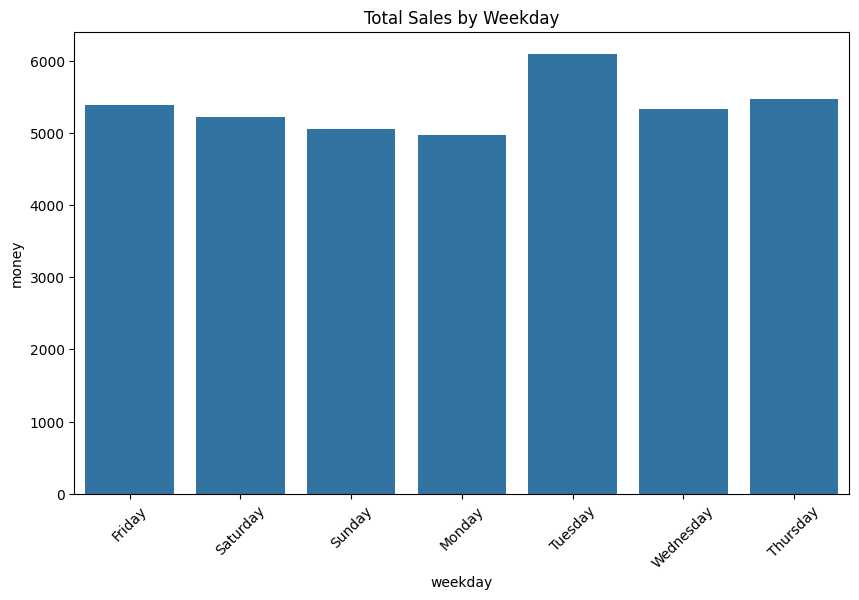

In [ ]:
# Sales by weekday

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='money', estimator=np.sum, errorbar=None)
plt.title('Total Sales by Weekday')
plt.xticks(rotation=45)
plt.show()

**Tuesday has Highest Sales and Monday has Minimum Sales**

In [ ]:
# Overall Revenue of Each coffee

coffee_data = df.groupby('coffee_name')['money'].sum().reset_index()

Text(0.5, 0, 'Revenue')

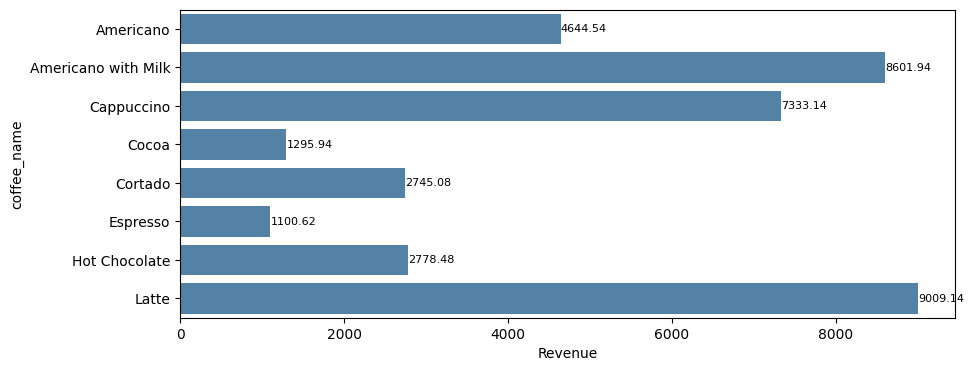

In [ ]:
 plt.figure(figsize=(10,4))
 ax = sns.barplot(data=coffee_data,x='money',y='coffee_name',color='steelblue')
 ax.bar_label(ax.containers[0], fontsize=8)
 plt.xlabel('Revenue')

In [ ]:
monthly_sales = df.groupby(['coffee_name','month_name']).count()['date'].unstack()
monthly_sales

month_name,April,July,June,March,May
coffee_name,,,,,
Americano,35,36,14,36,48
Americano with Milk,42,65,69,34,58
Cappuccino,43,32,46,20,55
Cocoa,6,9,5,6,9
Cortado,19,14,19,30,17
Espresso,7,14,10,10,8
Hot Chocolate,13,11,14,22,14
Latte,31,56,50,48,58


In [ ]:
monthly_sales = df.groupby(['coffee_name','month_name'])['date'].count().reset_index().pivot(index='month_name', columns='coffee_name', values='date').reset_index()
monthly_sales

coffee_name,month_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,April,35,42,43,6,19,7,13,31
1,July,36,65,32,9,14,14,11,56
2,June,14,69,46,5,19,10,14,50
3,March,36,34,20,6,30,10,22,48
4,May,48,58,55,9,17,8,14,58


In [ ]:
monthly_sales.columns

Index(['month_name', 'Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa',
       'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'],
      dtype='object', name='coffee_name')

In [ ]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


# Sales Plot By Coffee Type

([<matplotlib.axis.XTick at 0x7b6d504db610>,
 [Text(0, 0, 'April'),
  Text(1, 0, 'July'),
  Text(2, 0, 'June'),
  Text(3, 0, 'March'),
  Text(4, 0, 'May')])

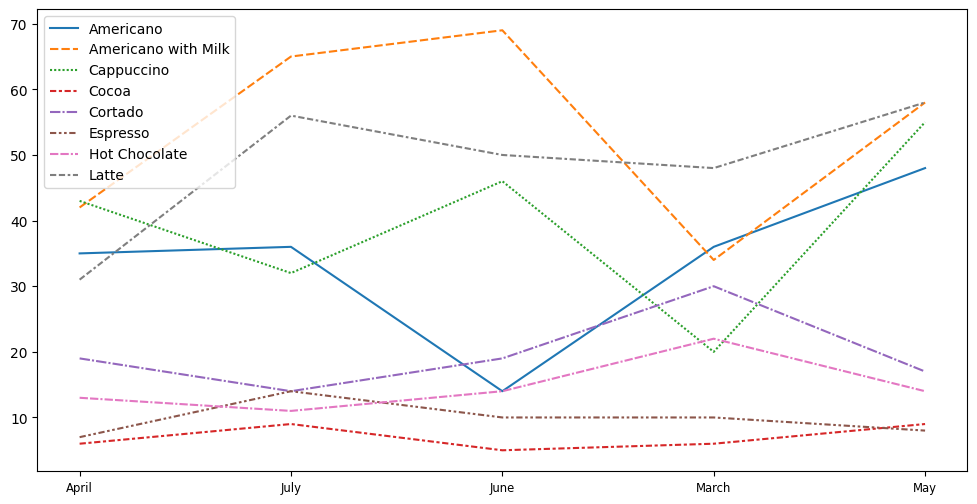

In [ ]:
 plt.figure(figsize=(12,6))
 sns.lineplot(data=monthly_sales)
 plt.legend(loc='upper left')
 plt.xticks(range(len(monthly_sales['month_name'])),monthly_sales['month_name'],size='small')

1. **Latte and Americano was the popular one with maximum revenue**
2. **Americano With Milk Was popular till june but after it declined**
3. **The Demand of Latte has increased over time**
4. **Cortado was lagging at the begining but its sales has increased with time**
5. **Cuppacino was fluctuating and it but it shows growth**

In [ ]:
 hourly_sales = df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
 hourly_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


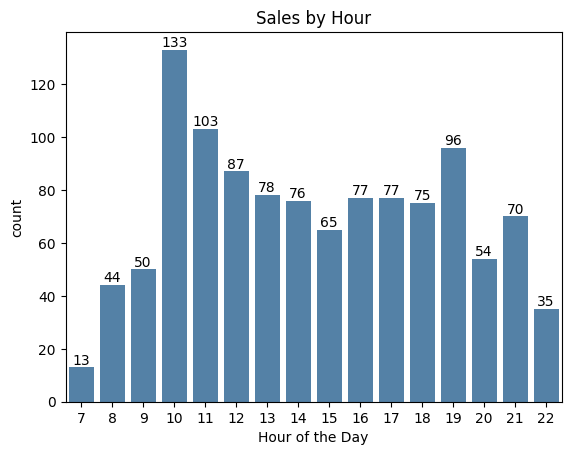

In [ ]:
ax = sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.show()

In [ ]:
hourly_sales_by_coffee = df.groupby(['hour', 'coffee_name'])['date'].count().reset_index().pivot(index='hour', columns='coffee_name', values='date').reset_index().fillna(0)
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,7,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,8,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,9,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


## Sales Hour of Each Coffee Type

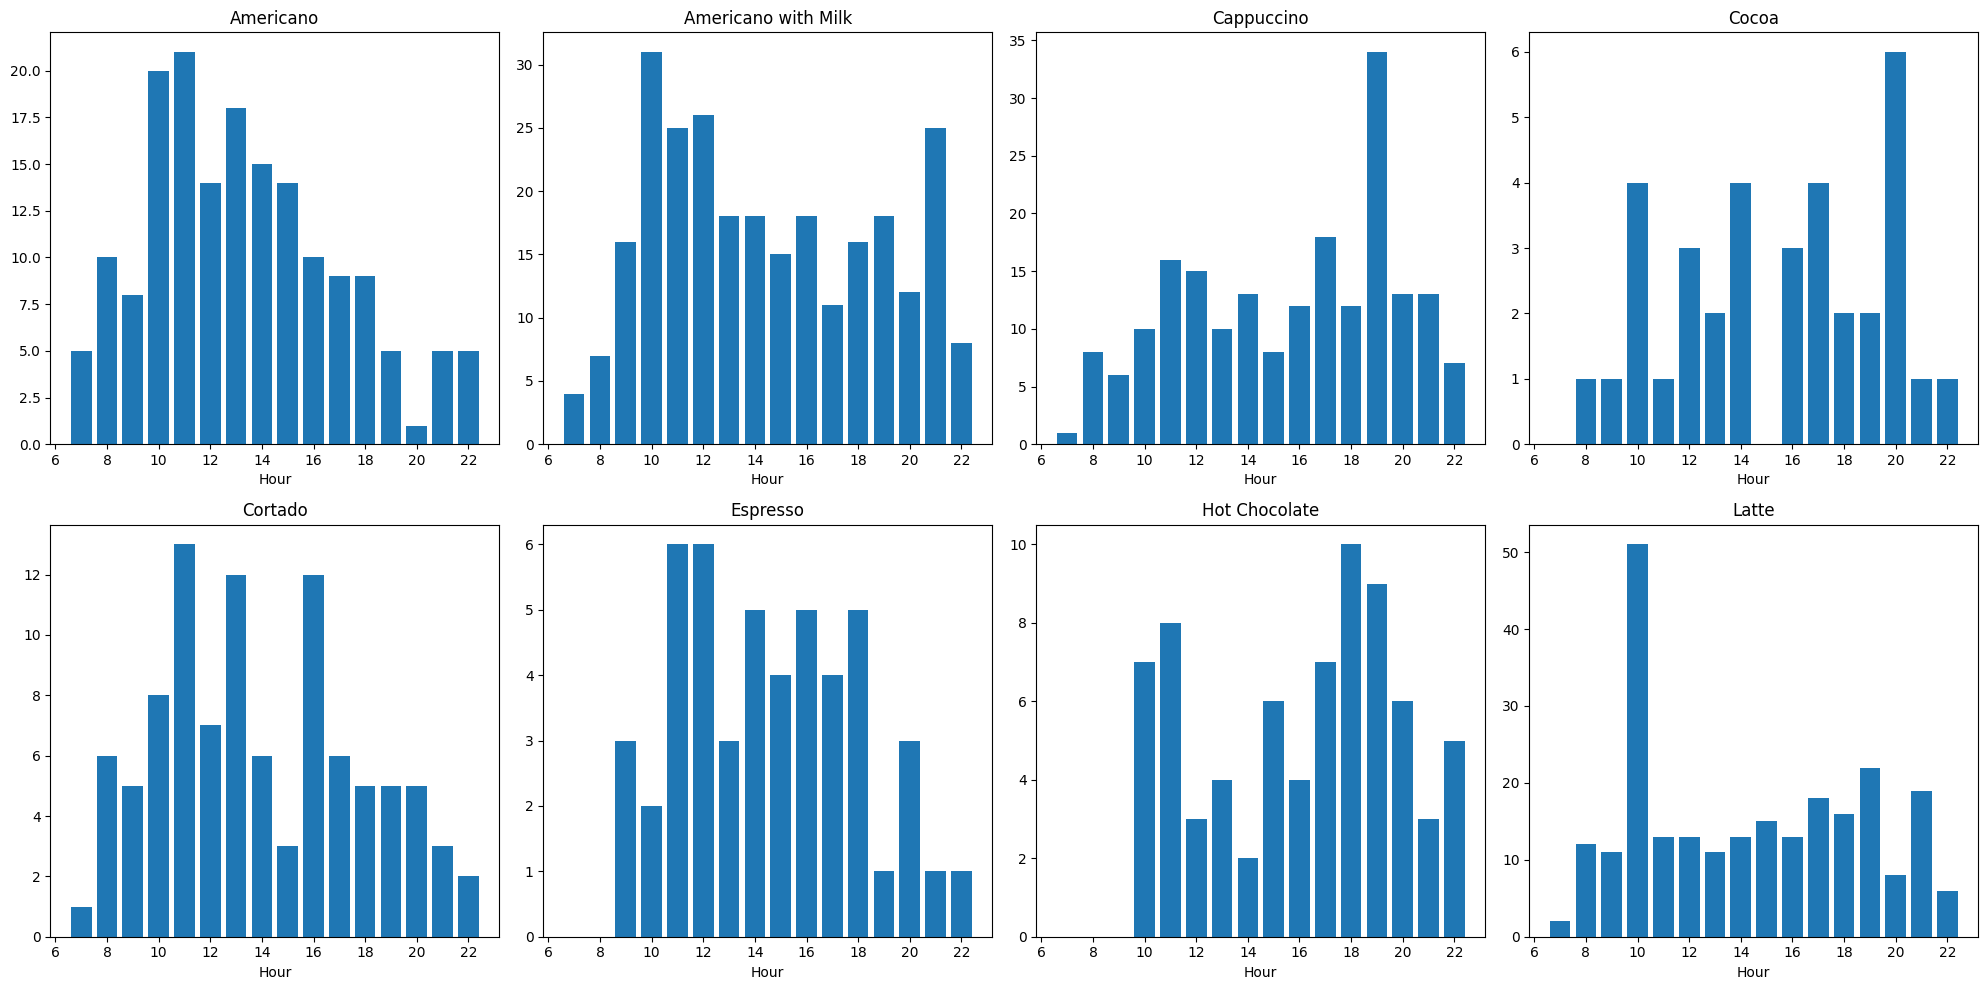

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Determine the number of columns you have (excluding the 'Index' column)
num_columns = len(hourly_sales_by_coffee.columns[1:])

# Loop through each column in the DataFrame, making sure not to exceed the number of subplots
for i, column in enumerate(hourly_sales_by_coffee.columns[1:num_columns+1]):  # Adjust the range as needed
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


1. **Cuppacino is selling most at the evening**
2. **Cortado has steady sales at noon time**
3. **Expresso has higer steady sales and it maintains its pace**
4. **Latte is selling most at 10'O clock evening**

In [ ]:
hourly_sales_by_coffee.columns[1:]

Index(['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa', 'Cortado',
       'Espresso', 'Hot Chocolate', 'Latte'],
      dtype='object', name='coffee_name')

In [ ]:
for i, column in enumerate(hourly_sales_by_coffee.columns[1:num_columns+1]):
  print(i,column)

0 Americano
1 Americano with Milk
2 Cappuccino
3 Cocoa
4 Cortado
5 Espresso
6 Hot Chocolate
7 Latte


In [ ]:
df['card'].nunique()

446

In [ ]:
daily_sales

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
145,2024-07-27,372.76
146,2024-07-28,78.86
147,2024-07-29,321.82
148,2024-07-30,650.48


Forecasting sales

In [ ]:
# Aggregate by day
daily_sales = df.groupby('date')['money'].sum().reset_index()


In [ ]:
!pip install statsmodels --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.0 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Example of fitting an ARIMA model
model = ARIMA(daily_sales['money'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  money   No. Observations:                  150
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -922.976
Date:                Sun, 01 Dec 2024   AIC                           1851.951
Time:                        12:02:55   BIC                           1860.963
Sample:                             0   HQIC                          1855.613
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0777      0.114     -0.681      0.496      -0.301       0.146
ma.L1         -0.7575      0.078     -9.702      0.000      -0.910      -0.604
sigma2      1.398e+04   1717.177      8.139      0.0

## Analysing Customer prefrence

In [ ]:
coffee_preference = df['coffee_name'].value_counts(normalize=True) * 100
coffee_preference


,proportion
coffee_name,
Americano with Milk,23.654016
Latte,21.447485
Cappuccino,17.299206
Americano,14.916152
Cortado,8.737864
Hot Chocolate,6.531333
Espresso,4.324801
Cocoa,3.089144


In [ ]:
od = df['coffee_name'].value_counts().index
od

Index(['Americano with Milk', 'Latte', 'Cappuccino', 'Americano', 'Cortado',
       'Hot Chocolate', 'Espresso', 'Cocoa'],
      dtype='object', name='coffee_name')

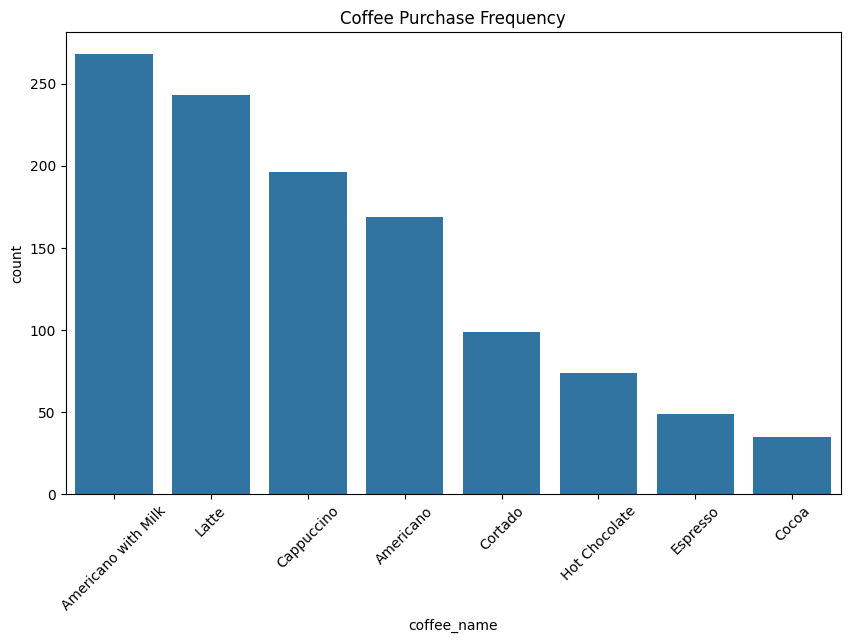

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Coffee Purchase Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
 df.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1133,446,ANON-0000-0000-0012,177
coffee_name,1133,8,Americano with Milk,268


1. Americano with Milk is the most popular product
2. maximum payment occured by card
3. Mostly ANON card is used here


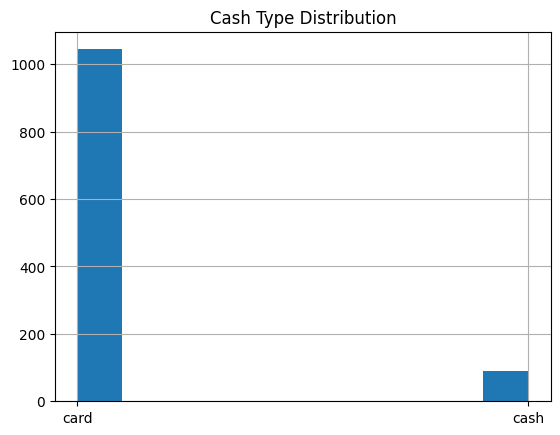

In [ ]:
df['cash_type'].hist().set_title('Cash Type Distribution')
plt.show()

# Time Series Anaysis For the Sales of the Coffee



In [ ]:
df.head(3)

,datetime,cash_type,card,money,coffee_name,date,hour,day,month_num,year,weekday,month_name,year_month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01,10,1,3,2024,Friday,March,2024-03
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12,1,3,2024,Friday,March,2024-03


In [ ]:
DF = df.groupby('date')['money'].sum().reset_index()
DF

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
145,2024-07-27,372.76
146,2024-07-28,78.86
147,2024-07-29,321.82
148,2024-07-30,650.48


In [ ]:
DF.shape

(150, 2)

In [ ]:
print(type(DF))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
DF['date'].min(), DF['date'].max()

(datetime.date(2024, 3, 1), datetime.date(2024, 7, 31))

In [ ]:
# print(DF.index.min())
# print(DF.index.max())

In [ ]:
DF.isnull().sum()

,0
date,0
money,0


In [ ]:
# Display rows where there are null values
print(DF[DF.isnull()])


    date  money
0    NaN    NaN
1    NaN    NaN
2    NaN    NaN
3    NaN    NaN
4    NaN    NaN
..   ...    ...
145  NaN    NaN
146  NaN    NaN
147  NaN    NaN
148  NaN    NaN
149  NaN    NaN

[150 rows x 2 columns]


In [ ]:
DF.dtypes

,0
date,object
money,float64


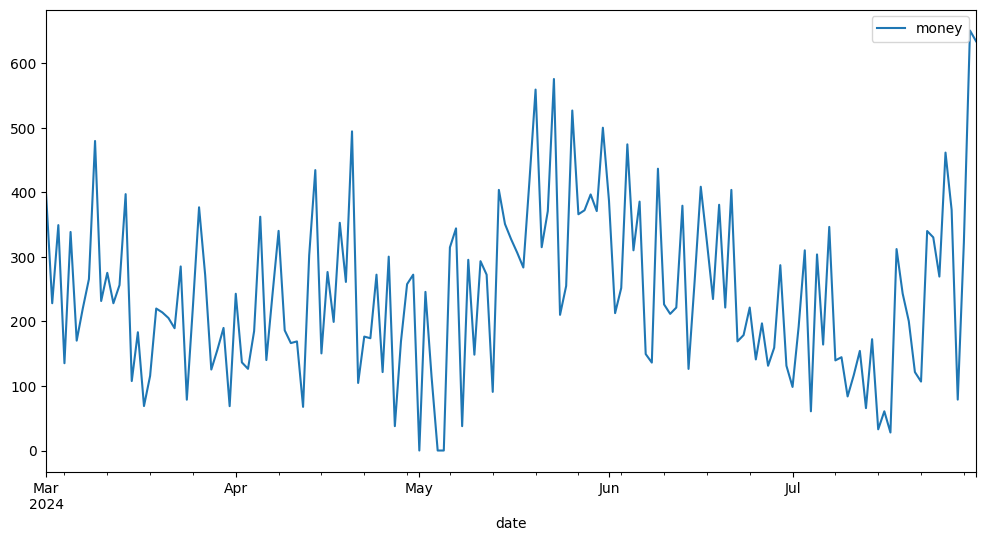

In [ ]:
DF.plot(figsize=(12,6))
plt.show()

In [ ]:
DF.set_index('date', inplace=True)

Seasonal Decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Example: Convert your Series to have a DatetimeIndex
DF.index = pd.to_datetime(DF.index)  # Ensure the index is in datetime format
DF = DF.asfreq('D')  # Set the frequency (e.g., 'D' for daily data)

In [ ]:
DF.fillna(0, inplace=True)

In [ ]:
print(type(DF))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
DF.head()

,money
date,
2024-03-01,396.3
2024-03-02,228.1
2024-03-03,349.1
2024-03-04,135.2
2024-03-05,338.5


In [ ]:
DF.shape

(153, 1)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2024-03-01 to 2024-07-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   money   153 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [ ]:
df1 = DF.copy()
df2 = DF.copy()
df3 = DF.copy()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    res = adfuller(data)
    print('test_stat',res[0])
    print('p_val',res[1])
    alpha = 0.05
    if res[1]> alpha:
        print('Ho accepted: Data is not stationary')
    else:
        print('H1 accepted: Data is stationary')

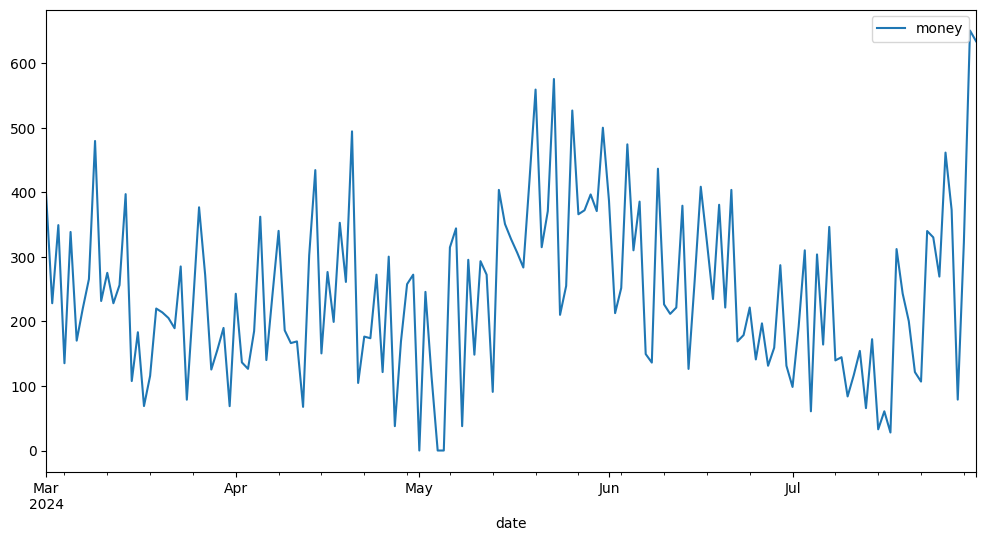

In [ ]:
# plt.figure()
df1.plot(figsize=(12,6))
plt.show()

In [ ]:
df1['money_1'] = df1['money'].rolling(window=3, min_periods=1).mean()

In [ ]:
df1

,money,money_1
date,,
2024-03-01,396.30,396.300000
2024-03-02,228.10,312.200000
2024-03-03,349.10,324.500000
2024-03-04,135.20,237.466667
2024-03-05,338.50,274.266667
...,...,...
2024-07-27,372.76,367.860000
2024-07-28,78.86,304.346667
2024-07-29,321.82,257.813333


<Axes: xlabel='date'>

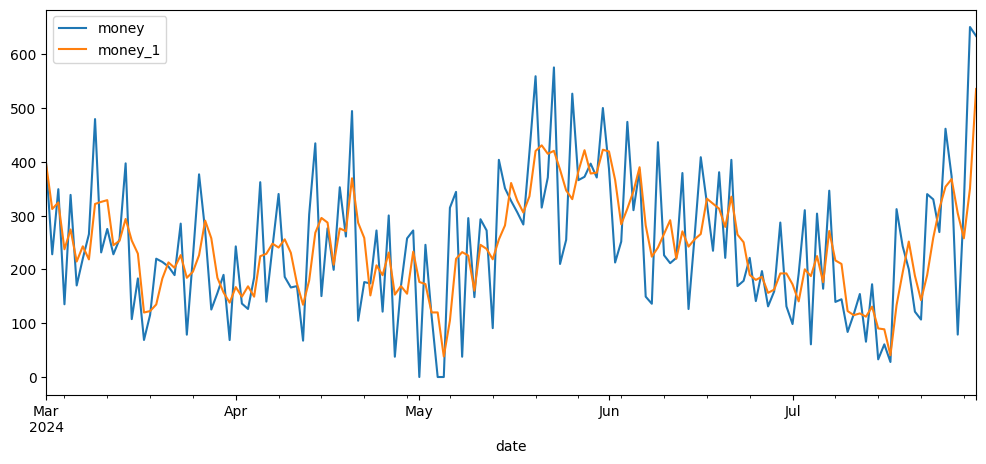

In [ ]:
df1[['money', 'money_1']].plot(figsize=(12,5))

In [ ]:
adf_test(df1['money'])

test_stat -2.3950547665243396
p_val 0.1431370317996271
Ho accepted: Data is not stationary


In [ ]:
adf_test(df1['money'].diff(1).dropna()) # d = 1

test_stat -9.087181511770668
p_val 3.911567323624255e-15
H1 accepted: Data is stationary


In [ ]:
adf_test(df1['money'].diff(2).dropna()) # d = 1

test_stat -4.345448293269364
p_val 0.0003702475050956096
H1 accepted: Data is stationary


In [ ]:
adf_test(df1['money'].diff(1).diff(1).dropna()) # d = 1

test_stat -6.964886368850894
p_val 8.967792091186672e-10
H1 accepted: Data is stationary


In [ ]:
fcs = df1['money'].diff(1).diff(1).dropna()

In [ ]:
adf_test(df1['money_1'])

test_stat -1.9937783876748023
p_val 0.28930770475893386
Ho accepted: Data is not stationary


In [ ]:
adf_test(df1['money_1'].diff(1).dropna())

test_stat -4.371627408321249
p_val 0.00033309807852419695
H1 accepted: Data is stationary


In [ ]:
adf_test(df1['money_1'].diff(1).diff(1).dropna())

test_stat -6.742474178487956
p_val 3.093772645066475e-09
H1 accepted: Data is stationary


In [ ]:
df_sm = df1['money_1'].diff(1).diff(1).dropna()

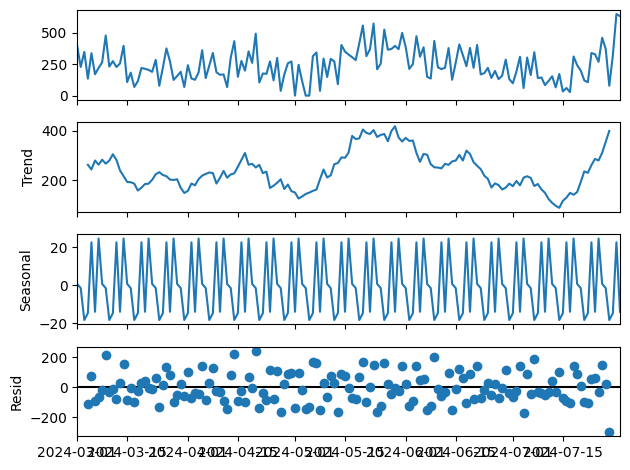

In [ ]:
# Decomposition of Normal sales data with group averaging

decom = seasonal_decompose(DF, model='additive')
decom.plot()
plt.show()

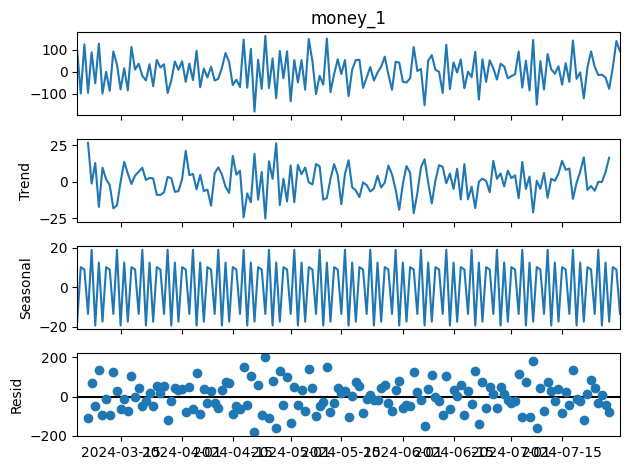

In [ ]:
# Decomposition with Smoothened Data

decom = seasonal_decompose(df_sm, model='additive')

original = decom.observed
trend = decom.trend
seasonal = decom.seasonal
resid = decom.resid

decom.plot()
plt.show()

<Axes: xlabel='date'>

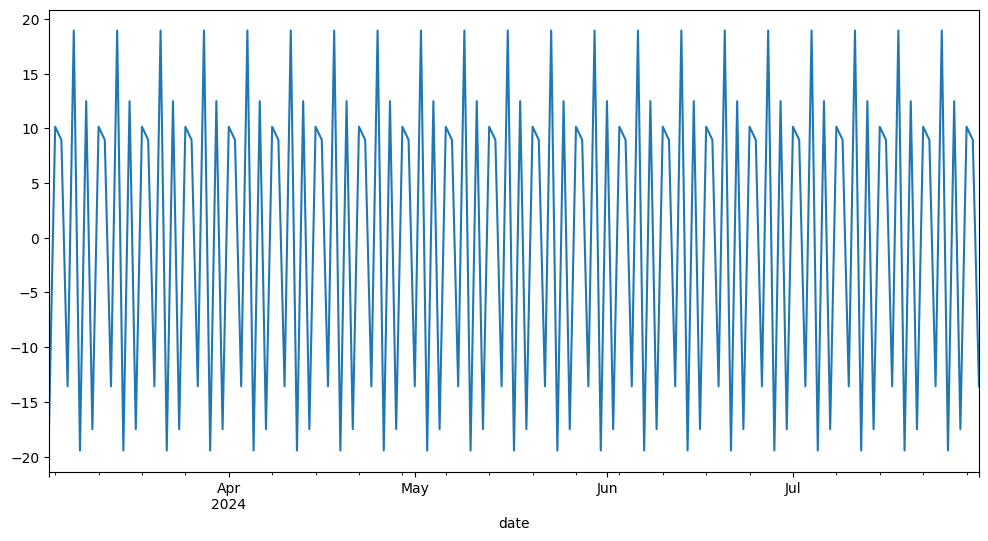

In [ ]:
seasonal.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *

def eval_model(test,fcast):
    mae = mean_absolute_error(test,fcast)
    mse = mean_squared_error(test,fcast)
    rmse = np.sqrt(mse)
    return mae,mse,rmse

def plot_model(train,test,fcast):
    plt.figure(figsize=(12,6))
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast')
    plt.legend()
    plt.show()

def custom_arima(train,test,p,d,q):
  model = ARIMA(np.log(train),order=(p,d,q))
  model_fit = model.fit()
  fcast = np.exp(model_fit.forecast(len(test)))
  plot_model(train,test,fcast)
  mae,mse,rmse = eval_model(test,fcast)
  res_df = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse},
                        index=[f'ARIMA({p,d,q})'])
  return res_df

In [ ]:
print(DF.index.dtype)  # Displays the index (in this case, the dates)
print(DF.values.dtype)  # Displays the values (in this case, the money sums)


datetime64[ns]
float64


In [ ]:
fcs.head()

,money
date,
2024-03-03,289.2
2024-03-04,-334.9
2024-03-05,417.2
2024-03-06,-371.6
2024-03-07,218.2


In [ ]:
fcs.shape

(151,)

In [ ]:
train = DF.iloc[:-30]
test = DF.iloc[-30:]

print(train.shape)
print(test.shape)
print(type(train))
print(type(test))

(123, 1)
(30, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
train2 = fcs.iloc[:-30]
test2 = fcs.iloc[-30:]

print(train2.shape)
print(test2.shape)
print(type(train2))
print(type(test2))

(121,)
(30,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
df_sm.shape

(151,)

<Axes: xlabel='date'>

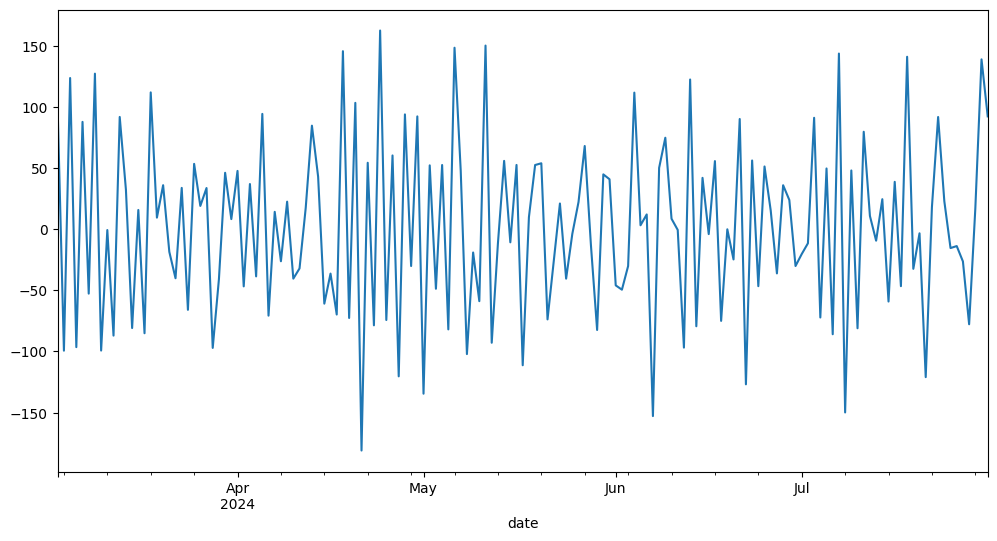

In [ ]:
df_sm.plot(figsize=(12,6))

<Axes: xlabel='date'>

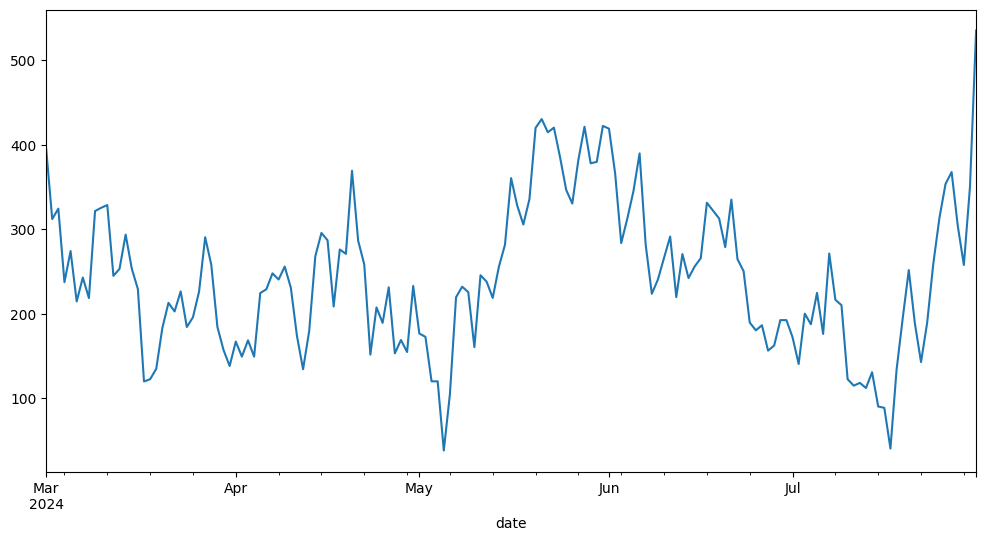

In [ ]:
sm_data = df1['money_1']
sm_data.plot(figsize=(12,6))

In [ ]:
train3 = df_sm.iloc[:-30]
test3 = df_sm.iloc[-30:]

print(train3.shape)
print(test3.shape)
print(type(train3))
print(type(test3))

(121,)
(30,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
train3.shape

(121,)

In [ ]:
train4 = seasonal.iloc[:-30]
test4 = seasonal.iloc[-30:]

print(train4.shape)
print(test4.shape)
print(type(train4))
print(type(test4))

(121,)
(30,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
train5 = sm_data.iloc[:-30]
test5 = sm_data.iloc[-30:]

print(train5.shape)
print(test5.shape)
print(type(train5))
print(type(test5))

(123,)
(30,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
train.tail()

,money
date,
2024-06-27,-121.48
2024-06-28,93.56
2024-06-29,99.94
2024-06-30,-283.64
2024-07-01,122.96


In [ ]:
test.head()

,money
date,
2024-07-02,126.38
2024-07-03,24.50
2024-07-04,-367.40
2024-07-05,492.30
2024-07-06,-382.56


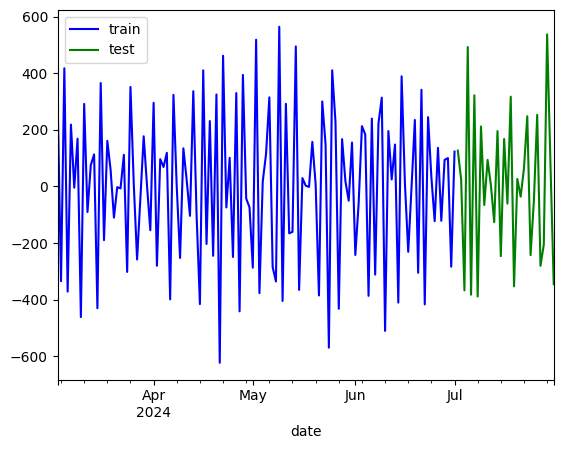

In [ ]:
train.plot(color='blue',label='train')
test.plot(color='green', label='test')
plt.legend()
plt.show()

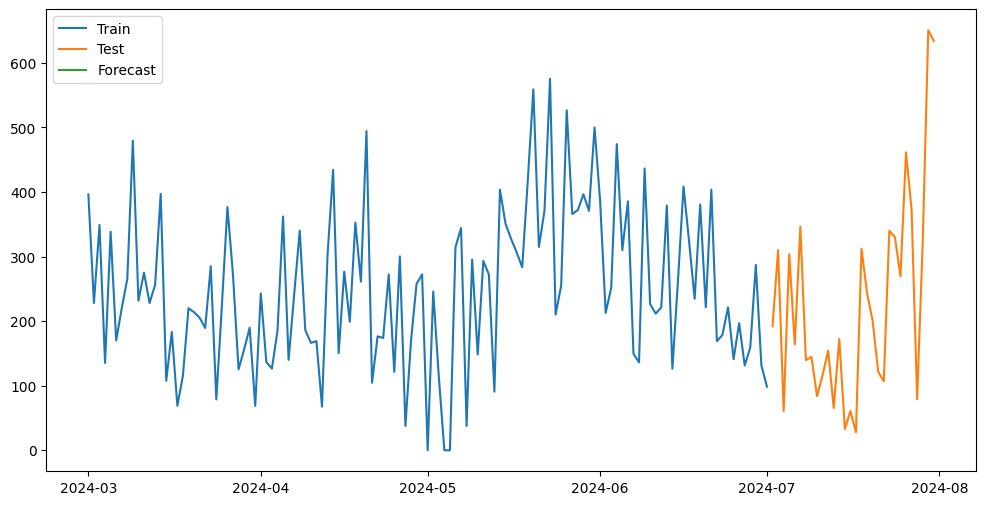

ValueError: Input contains NaN.

In [ ]:
custom_arima(train,test,1,1,1)

<Axes: xlabel='date'>

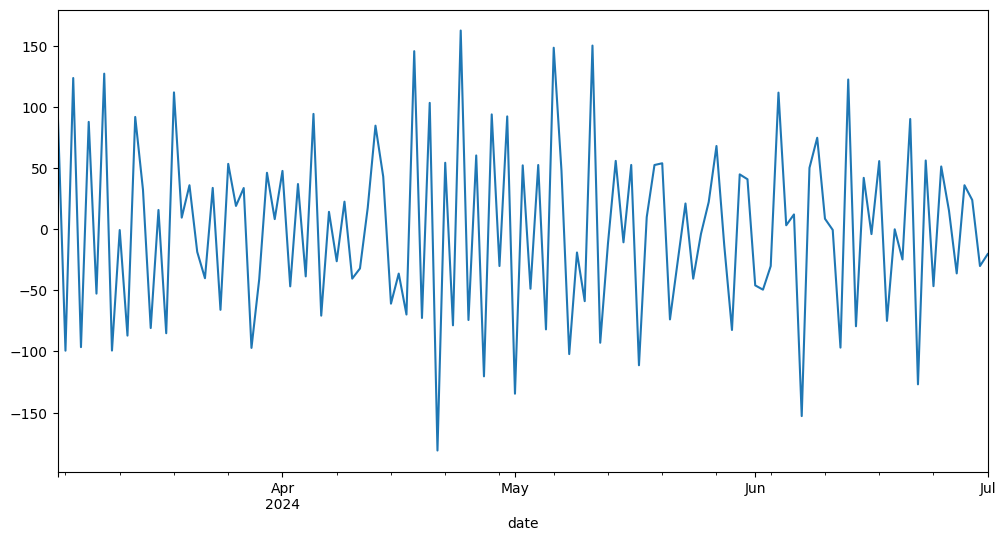

In [ ]:
train3.plot(figsize=(12,6))

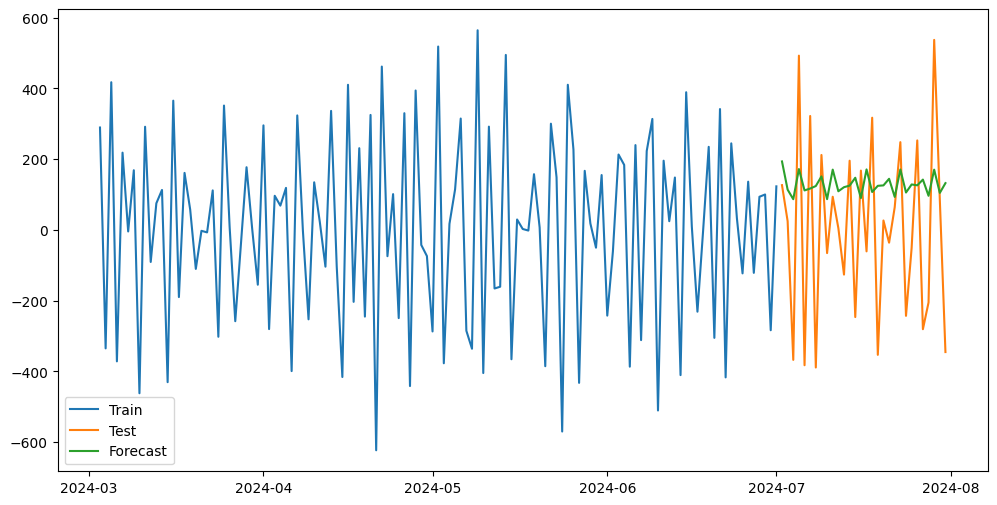

,MAE,MSE,RMSE
"ARIMA((3, 2, 10))",229.059941,77267.496169,277.970315


In [ ]:
custom_arima(train2,test2,3,2,10)

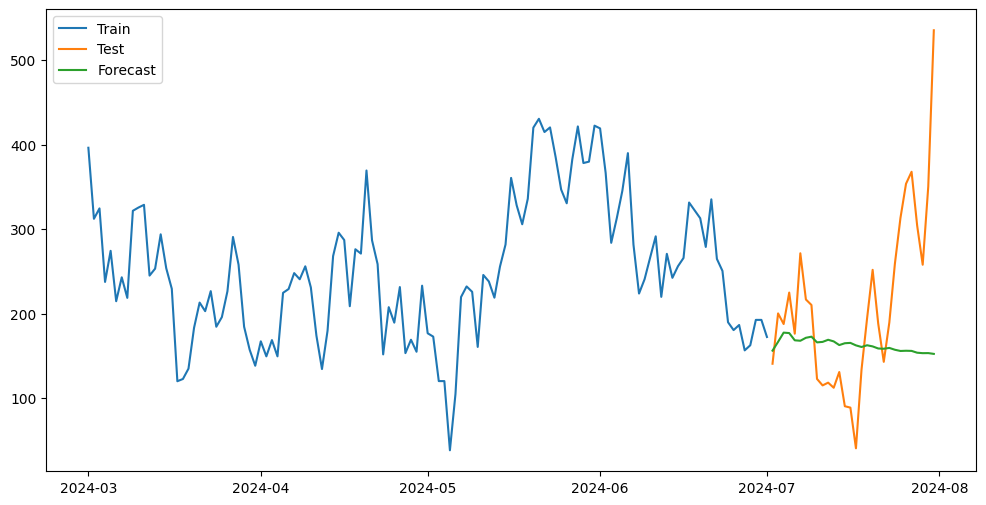

,MAE,MSE,RMSE
"ARIMA((3, 2, 10))",84.536477,13531.374968,116.324438


In [ ]:
custom_arima(train5,test5,3,2,10)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}")

In [ ]:
m1 = ARIMA(train, order=(1,1,1))
m1_fit = m1.fit()

In [ ]:
print(test.shape)

(30,)


In [ ]:
forcast_m1 = m1_fit.forecast(30)
forcast_m1

,predicted_mean
2024-07-02,-79.672134
2024-07-03,51.132653
2024-07-04,-33.305545
2024-07-05,21.201706
2024-07-06,-13.984270
2024-07-07,8.729275
2024-07-08,-5.932962
2024-07-09,3.531927
2024-07-10,-2.577927
2024-07-11,1.366157


In [ ]:
print(m1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  money   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -813.313
Date:                Sun, 01 Dec 2024   AIC                           1632.625
Time:                        12:02:59   BIC                           1640.988
Sample:                    03-03-2024   HQIC                          1636.021
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6455      0.081     -7.963      0.000      -0.804      -0.487
ma.L1         -0.9995      6.259     -0.160      0.873     -13.267      11.268
sigma2      4.296e+04   2.69e+05      0.160      0.8

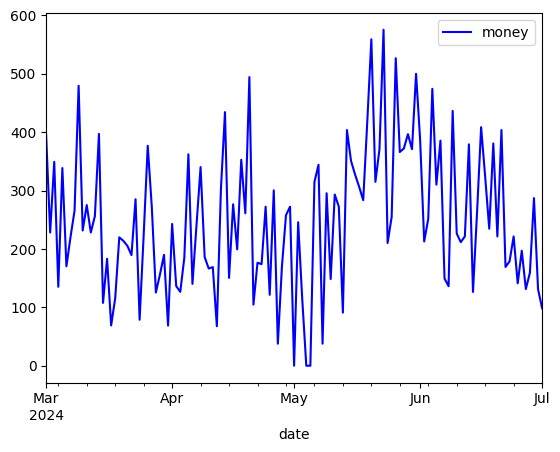

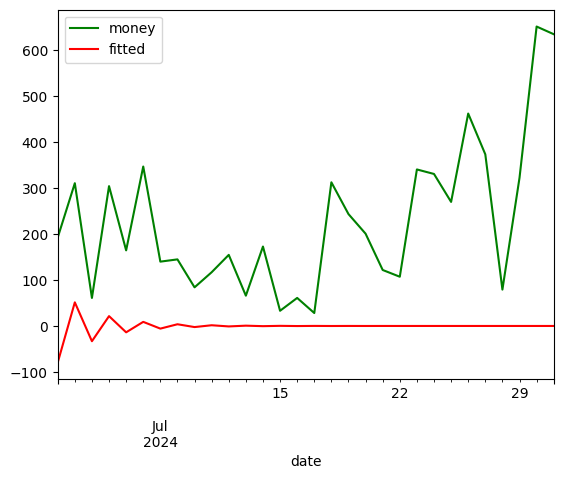

In [ ]:
train.plot(color='blue',label='train')
test.plot(color='green', label='test')
forcast_m1.plot(color='red',label='fitted')
plt.legend()
plt.show()

In [ ]:
evaluate_model(test,forcast_m1)

MSE: 76963.24479402533, MAE: 229.04065139005567, RMSE: 277.4225023209641, R2: -2.0490876397607716


In [ ]:
m2 = ARIMA(train, order=(2,2,2))
m2_fit = m2.fit()

In [ ]:
forcast_m2 = m2_fit.forecast(30)
forcast_m2

,predicted_mean
2024-07-02,24.711237
2024-07-03,-94.480714
2024-07-04,74.732301
2024-07-05,-29.193998
2024-07-06,-16.884006
2024-07-07,25.734106
2024-07-08,-23.168840
2024-07-09,2.054939
2024-07-10,2.761927
2024-07-11,-11.683362


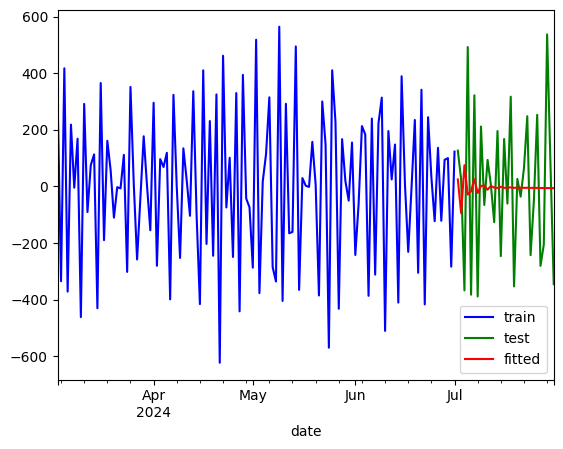

In [ ]:
train.plot(color='blue',label='train')
test.plot(color='green', label='test')
forcast_m2.plot(color='red',label='fitted')
plt.legend()
plt.show()

## 2nd Approach

In [ ]:
p = list(range(1,15))
d = [1,2]
q = list(range(1,15))
print(len(p))
print(len(d))
print(len(q))
print(14*2*14)


14
2
14
392


In [ ]:
df1

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2024-07-27,372.76
2024-07-28,78.86
2024-07-29,321.82


In [ ]:
train.shape

(121,)

In [ ]:
import numpy as np

# Check the data type and shape
print(type(train))
print(train.shape)

# If train is a NumPy array, you can reshape it:
if isinstance(train, np.ndarray):
    # Reshape to a 2D array with 121 rows and 1 column
    train = train.reshape(-1, 1)
    print(train.shape)  # Should print (121, 1)

# If train is a Pandas Series or DataFrame:
# Convert to NumPy array and reshape as needed
if isinstance(train, pd.Series) or isinstance(train, pd.DataFrame):
    train_array = train.values.reshape(-1, 1)
    print(train_array.shape)  # Should print (121, 1)

# Now you can use train for evaluation, depending on your model's input shape requirements.

<class 'pandas.core.series.Series'>
(121,)
(121, 1)


In [ ]:
pdq_list = []
rmse_list = []
for i in p:
    for j in d:
        for k in q:
            model = ARIMA(np.log(train5),order=(i,j,k))
            model_fit = model.fit()
            fcast = np.exp(model_fit.forecast(len(test5)))
            rmse = np.sqrt(mean_squared_error(test5,fcast))
            print(f'p={i},d={j},q={k},RMSE={rmse}')
            rmse_list.append(rmse)
            pdq_list.append([i,j,k])

p=1,d=1,q=1,RMSE=103.47799301682322
p=1,d=1,q=2,RMSE=103.17574686208793
p=1,d=1,q=3,RMSE=106.48068390544883
p=1,d=1,q=4,RMSE=107.84522665833775
p=1,d=1,q=5,RMSE=107.89630082389522
p=1,d=1,q=6,RMSE=98.97026424911716
p=1,d=1,q=7,RMSE=102.72470637009512
p=1,d=1,q=8,RMSE=102.88509271188555
p=1,d=1,q=9,RMSE=104.88541049451875
p=1,d=1,q=10,RMSE=104.51765384403699
p=1,d=1,q=11,RMSE=104.76584578962768
p=1,d=1,q=12,RMSE=107.23793259914542
p=1,d=1,q=13,RMSE=96.21462227684769
p=1,d=1,q=14,RMSE=96.86843562072679
p=1,d=2,q=1,RMSE=119.82233127727527
p=1,d=2,q=2,RMSE=120.50219481309182
p=1,d=2,q=3,RMSE=121.44051336600555
p=1,d=2,q=4,RMSE=115.7305413586629
p=1,d=2,q=5,RMSE=114.51969677805849
p=1,d=2,q=6,RMSE=116.82328473908635
p=1,d=2,q=7,RMSE=119.06630176800772
p=1,d=2,q=8,RMSE=117.22840441329046
p=1,d=2,q=9,RMSE=117.31078629263253
p=1,d=2,q=10,RMSE=113.19581125434456
p=1,d=2,q=11,RMSE=120.91461464539668
p=1,d=2,q=12,RMSE=122.06138398125239
p=1,d=2,q=13,RMSE=121.00716873584909
p=1,d=2,q=14,RMSE=128.3

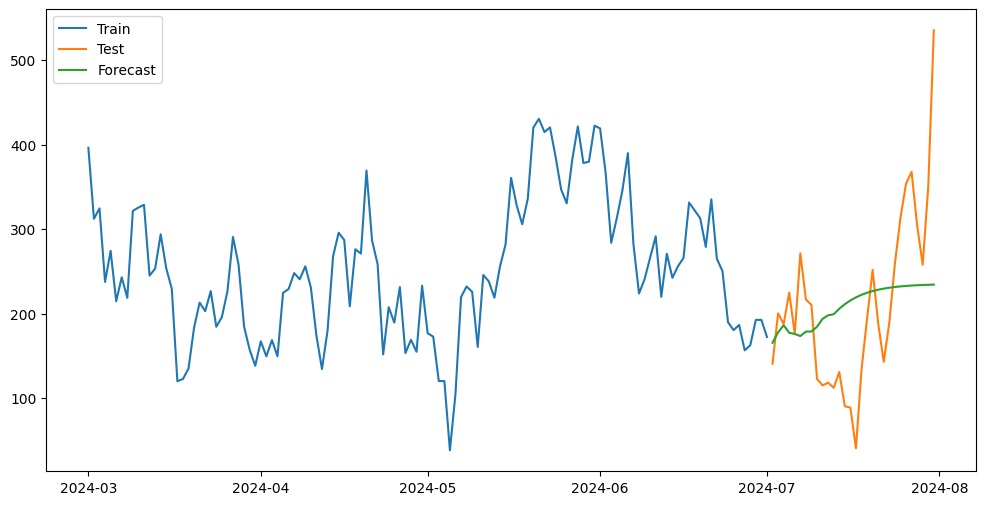

,MAE,MSE,RMSE
"ARIMA((1, 1, 13))",75.370692,9257.25354,96.214622


In [ ]:
custom_arima(train5,test5,1,1,13)

In [ ]:
sm_data.head()

,money_1
date,
2024-03-01,396.300000
2024-03-02,312.200000
2024-03-03,324.500000
2024-03-04,237.466667
2024-03-05,274.266667


**The result states that this (1,1,13) parameter best suited for the ARIMA model here**